In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
from nltk import sent_tokenize

In [3]:
import nltk
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Load in Database

In [4]:
df = pd.read_csv('inquirer_tech_20191106_total.csv', encoding='cp1252')

In [5]:
file = pd.read_csv('inquirer_crawling_result.csv', encoding='cp1252')

In [6]:
file.head()

,Title,Publish,Time,Text,Topics
0,Video game ¡®Death Stranding¡¯ bids to rekindl...,Agence France-Presse,"04:18 PM November 06, 2019",In a world fractured by political populism and...,"['Death Stranding', 'Hideo Kojima', 'Japan', '..."
1,¡®Help! What is this?¡¯ Netizens take to Reddi...,Agence France-Presse,"04:04 PM November 06, 2019",¡°How did I get chlamydia?¡± ¡°Is this herpes?...,"['diagnosis', 'Health care', 'Reddit', 'sexual..."
2,Preschool children who have more screen time s...,AFP Relaxnews,"03:59 PM November 06, 2019",New United States research has found that pres...,"['Children', 'language', 'Learning', 'screen t..."
3,Even running just once a week could significan...,AFP Relaxnews,"03:44 PM November 06, 2019",New research has found that any amount of runn...,"['Cancer', 'cardiovascular disease', 'Health',..."
4,"No more eggplants and peaches? Facebook, Insta...",INQUIRER.net,"03:02 PM November 06, 2019",Facebook and Instagram have banned the ¡°sexua...,"['Community Standards', 'eggplant', 'Emoji', '..."


In [7]:
# cnx = sqlite3.connect(db)

In [8]:
# df = pd.read_sql_query("SELECT * FROM longform", cnx)

In [9]:
df = df.merge(file)
df

,Category,Title,Link,Publish,Time,Text,Topics
0,Gaming,Video game ¡®Death Stranding¡¯ bids to rekindl...,https://technology.inquirer.net/92149/video-ga...,Agence France-Presse,"04:18 PM November 06, 2019",In a world fractured by political populism and...,"['Death Stranding', 'Hideo Kojima', 'Japan', '..."
1,"Science, Health and Research",¡®Help! What is this?¡¯ Netizens take to Reddi...,https://technology.inquirer.net/92143/help-wha...,Agence France-Presse,"04:04 PM November 06, 2019",¡°How did I get chlamydia?¡± ¡°Is this herpes?...,"['diagnosis', 'Health care', 'Reddit', 'sexual..."
2,"Science, Health and Research",Preschool children who have more screen time s...,https://technology.inquirer.net/92146/preschoo...,AFP Relaxnews,"03:59 PM November 06, 2019",New United States research has found that pres...,"['Children', 'language', 'Learning', 'screen t..."
3,"Science, Health and Research",Even running just once a week could significan...,https://technology.inquirer.net/92141/even-run...,AFP Relaxnews,"03:44 PM November 06, 2019",New research has found that any amount of runn...,"['Cancer', 'cardiovascular disease', 'Health',..."
4,Social Media,"No more eggplants and peaches? Facebook, Insta...",https://technology.inquirer.net/92118/goodbye-...,INQUIRER.net,"03:02 PM November 06, 2019",Facebook and Instagram have banned the ¡°sexua...,"['Community Standards', 'eggplant', 'Emoji', '..."
...,...,...,...,...,...,...,...
13591,latest stories,Sales of Microsoft¡¯s Kinect top 10 million,https://technology.inquirer.net/61/sales-of-mi...,Agence France-Presse,"05:37 PM March 10, 2011",WASHINGTON?Microsoft said Wednesday that sales...,"['Computing & Information Technology', 'Consum..."
13592,Photos & Videos,Google Maps now helps users beat traffic jams,https://technology.inquirer.net/58/google-maps...,Agence France-Presse,"06:29 AM March 08, 2011",WASHINGTON? Google upgraded its popular Google...,"['Good news', 'Internet', 'Road transport']"
13593,Tech News,Google purges tainted apps from Android phones,https://technology.inquirer.net/56/google-purg...,Agence France-Presse,"05:55 AM March 08, 2011",SAN FRANCISCO?Google has remotely purged Andro...,"['Computing & Information Technology', 'Intern..."
13594,Tech News,CCP goes digital with its collection,https://technology.inquirer.net/54/ccp-goes-di...,Philippine Daily Inquirer,"05:54 AM March 08, 2011","MANILA, Philippines?The Cultural Center of the...","['Arts and Entertainment and Culture', 'Asia A..."


## preview of DF

In [10]:
df.head()

,Category,Title,Link,Publish,Time,Text,Topics
0,Gaming,Video game ¡®Death Stranding¡¯ bids to rekindl...,https://technology.inquirer.net/92149/video-ga...,Agence France-Presse,"04:18 PM November 06, 2019",In a world fractured by political populism and...,"['Death Stranding', 'Hideo Kojima', 'Japan', '..."
1,"Science, Health and Research",¡®Help! What is this?¡¯ Netizens take to Reddi...,https://technology.inquirer.net/92143/help-wha...,Agence France-Presse,"04:04 PM November 06, 2019",¡°How did I get chlamydia?¡± ¡°Is this herpes?...,"['diagnosis', 'Health care', 'Reddit', 'sexual..."
2,"Science, Health and Research",Preschool children who have more screen time s...,https://technology.inquirer.net/92146/preschoo...,AFP Relaxnews,"03:59 PM November 06, 2019",New United States research has found that pres...,"['Children', 'language', 'Learning', 'screen t..."
3,"Science, Health and Research",Even running just once a week could significan...,https://technology.inquirer.net/92141/even-run...,AFP Relaxnews,"03:44 PM November 06, 2019",New research has found that any amount of runn...,"['Cancer', 'cardiovascular disease', 'Health',..."
4,Social Media,"No more eggplants and peaches? Facebook, Insta...",https://technology.inquirer.net/92118/goodbye-...,INQUIRER.net,"03:02 PM November 06, 2019",Facebook and Instagram have banned the ¡°sexua...,"['Community Standards', 'eggplant', 'Emoji', '..."


In [11]:
df.shape

(13596, 7)

In [12]:
#clean up authors names
# df.author = df.author.str.strip('\n')
#check that it worked
# df.head()

In [13]:
#cut down columns
# df = df[['title', 'author', 'content', 'year', 'month', 'category']]

In [14]:
#check for null values
df.isnull().sum()

Category      0
Title         0
Link          0
Publish     962
Time          0
Text          1
Topics        2
dtype: int64

In [15]:
#drop all rows where there is no article text
df.dropna(subset=['Text'], inplace = True)

In [16]:
#check new shape of df
df.shape

(13595, 7)

In [17]:
#verify no null values in content column
df.isnull().sum()

Category      0
Title         0
Link          0
Publish     962
Time          0
Text          0
Topics        1
dtype: int64

In [18]:
#view counts of article categories
df.groupby('Category').Title.count()

Category
Advertorial                       98
Animals                          175
Apps and Software                 61
Apps and Softwares              1440
Architecture and Engineering      23
Branded Content                   48
Columns                            9
Communications                    46
Earth and Environment            348
Editors' Picks                    55
Featured Gallery                 464
Gadgets                         1547
Gaming                           868
Headlines                       1182
Health                             5
Internet                        1416
Online Transactions               29
Photos & Videos                  197
Science, Health and Research    1738
Social Media                    1406
Space                            239
Tech News                        861
Telecommunication                  1
Transportation                    87
Uncategorized                      1
latest stories                  1251
Name: Title, dtype: int64

In [19]:
#create new column for the character length of each article
df['len_article'] = df.Text.str.len()

In [20]:
#drop rows where article is <2,500 or >15,000 characters
df = df[(df.len_article >= 2500) & (df.len_article <= 15000)]

In [21]:
df.head()

,Category,Title,Link,Publish,Time,Text,Topics,len_article
0,Gaming,Video game ¡®Death Stranding¡¯ bids to rekindl...,https://technology.inquirer.net/92149/video-ga...,Agence France-Presse,"04:18 PM November 06, 2019",In a world fractured by political populism and...,"['Death Stranding', 'Hideo Kojima', 'Japan', '...",3871
2,"Science, Health and Research",Preschool children who have more screen time s...,https://technology.inquirer.net/92146/preschoo...,AFP Relaxnews,"03:59 PM November 06, 2019",New United States research has found that pres...,"['Children', 'language', 'Learning', 'screen t...",3008
6,Telecommunication,Hungary says Huawei to help build its 5G wirel...,https://technology.inquirer.net/92112/hungary-...,Associated Press,"07:07 AM November 06, 2019","BUDAPEST, Hungary ? Chinese tech company Huawe...","['5G', 'Cybersecurity', 'Espionage', 'European...",3062
7,Tech News,"Foreign startups, investors in Silicon Valley ...",https://technology.inquirer.net/92104/foreign-...,NaN,The Korea Herald,"SEOUL ??Sunnyvale, the once sleepy orchard tur...","['Asia', 'Business', 'investment', 'Silicon Va...",4416
8,"Science, Health and Research",India to build world¡¯s potentially biggest fa...,https://technology.inquirer.net/92100/india-to...,NaN,The Straits Times,"BANGALORE ? On Friday, the Indian government w...","['Asia', 'Facial Recognition System', 'India',...",4877


In [22]:
#check new shape after dropping additional rows
df.shape

(5202, 8)

In [23]:
#preview df
df.head()

,Category,Title,Link,Publish,Time,Text,Topics,len_article
0,Gaming,Video game ¡®Death Stranding¡¯ bids to rekindl...,https://technology.inquirer.net/92149/video-ga...,Agence France-Presse,"04:18 PM November 06, 2019",In a world fractured by political populism and...,"['Death Stranding', 'Hideo Kojima', 'Japan', '...",3871
2,"Science, Health and Research",Preschool children who have more screen time s...,https://technology.inquirer.net/92146/preschoo...,AFP Relaxnews,"03:59 PM November 06, 2019",New United States research has found that pres...,"['Children', 'language', 'Learning', 'screen t...",3008
6,Telecommunication,Hungary says Huawei to help build its 5G wirel...,https://technology.inquirer.net/92112/hungary-...,Associated Press,"07:07 AM November 06, 2019","BUDAPEST, Hungary ? Chinese tech company Huawe...","['5G', 'Cybersecurity', 'Espionage', 'European...",3062
7,Tech News,"Foreign startups, investors in Silicon Valley ...",https://technology.inquirer.net/92104/foreign-...,NaN,The Korea Herald,"SEOUL ??Sunnyvale, the once sleepy orchard tur...","['Asia', 'Business', 'investment', 'Silicon Va...",4416
8,"Science, Health and Research",India to build world¡¯s potentially biggest fa...,https://technology.inquirer.net/92100/india-to...,NaN,The Straits Times,"BANGALORE ? On Friday, the Indian government w...","['Asia', 'Facial Recognition System', 'India',...",4877


In [24]:
pip install -U gensim

Requirement already up-to-date: gensim in /Users/com/opt/anaconda3/lib/python3.7/site-packages (3.8.1)
Note: you may need to restart the kernel to use updated packages.


In [26]:
from gensim.summarization.summarizer import summarize

In [27]:
#create try/accept function to take care of edge case articles
#use gensim summarizer for baseline summary model
def gensim_summarizer(x, ratio_):
    try:
        return summarize(x, ratio = ratio_)
    except:
        return ''

In [28]:
pd.options.mode.chained_assignment = None

In [29]:
#test the gensim_summarizer on subset of data
test_df = df.iloc[:10]
test_df['gensim_summary'] = test_df.Text.apply(lambda x : gensim_summarizer(x, ratio_ = .05))

In [30]:
#verify that it worked
test_df

,Category,Title,Link,Publish,Time,Text,Topics,len_article,gensim_summary
0,Gaming,Video game ¡®Death Stranding¡¯ bids to rekindl...,https://technology.inquirer.net/92149/video-ga...,Agence France-Presse,"04:18 PM November 06, 2019",In a world fractured by political populism and...,"['Death Stranding', 'Hideo Kojima', 'Japan', '...",3871,
2,"Science, Health and Research",Preschool children who have more screen time s...,https://technology.inquirer.net/92146/preschoo...,AFP Relaxnews,"03:59 PM November 06, 2019",New United States research has found that pres...,"['Children', 'language', 'Learning', 'screen t...",3008,
6,Telecommunication,Hungary says Huawei to help build its 5G wirel...,https://technology.inquirer.net/92112/hungary-...,Associated Press,"07:07 AM November 06, 2019","BUDAPEST, Hungary ? Chinese tech company Huawe...","['5G', 'Cybersecurity', 'Espionage', 'European...",3062,
7,Tech News,"Foreign startups, investors in Silicon Valley ...",https://technology.inquirer.net/92104/foreign-...,NaN,The Korea Herald,"SEOUL ??Sunnyvale, the once sleepy orchard tur...","['Asia', 'Business', 'investment', 'Silicon Va...",4416,
8,"Science, Health and Research",India to build world¡¯s potentially biggest fa...,https://technology.inquirer.net/92100/india-to...,NaN,The Straits Times,"BANGALORE ? On Friday, the Indian government w...","['Asia', 'Facial Recognition System', 'India',...",4877,
9,"Science, Health and Research",India to build world¡¯s potentially biggest fa...,https://technology.inquirer.net/92100/india-to...,NaN,The Straits Times,"BANGALORE ? On Friday, the Indian government w...","['Asia', 'Facial Recognition System', 'India',...",4877,
10,"Science, Health and Research",India to build world¡¯s potentially biggest fa...,https://technology.inquirer.net/92100/india-to...,NaN,The Straits Times,"BANGALORE ? On Friday, the Indian government w...","['Asia', 'Facial Recognition System', 'India',...",4877,
11,"Science, Health and Research",India to build world¡¯s potentially biggest fa...,https://technology.inquirer.net/92100/india-to...,NaN,The Straits Times,"BANGALORE ? On Friday, the Indian government w...","['Asia', 'Facial Recognition System', 'India',...",4877,
17,Social Media,From toast of town to toxic: Facebook CEO on o...,https://technology.inquirer.net/92092/from-toa...,Associated Press,"07:14 AM November 05, 2019",WASHINGTON ? Mark Zuckerberg¡¯s social network...,"['Democrats', 'Facebook', 'Mark Zuckerberg', '...",7043,Mark Zuckerberg¡¯s social network in Washingto...
19,Earth and Environment,"Environment now a focus for young Chinese, say...",https://technology.inquirer.net/92080/environm...,Agence France-Presse,"05:05 PM November 04, 2019",China¡¯s millennials are increasingly pursuing...,"['China', 'eco-friendly', 'Environment', 'Mill...",4712,


In [31]:
#apply gensim_summarizer function to each row of full dataframe
df['gensim_summary'] = df.Text.apply(lambda x : gensim_summarizer(x, ratio_ = .05))

In [32]:
#check that it worked
df.head(100)

,Category,Title,Link,Publish,Time,Text,Topics,len_article,gensim_summary
0,Gaming,Video game ¡®Death Stranding¡¯ bids to rekindl...,https://technology.inquirer.net/92149/video-ga...,Agence France-Presse,"04:18 PM November 06, 2019",In a world fractured by political populism and...,"['Death Stranding', 'Hideo Kojima', 'Japan', '...",3871,
2,"Science, Health and Research",Preschool children who have more screen time s...,https://technology.inquirer.net/92146/preschoo...,AFP Relaxnews,"03:59 PM November 06, 2019",New United States research has found that pres...,"['Children', 'language', 'Learning', 'screen t...",3008,
6,Telecommunication,Hungary says Huawei to help build its 5G wirel...,https://technology.inquirer.net/92112/hungary-...,Associated Press,"07:07 AM November 06, 2019","BUDAPEST, Hungary ? Chinese tech company Huawe...","['5G', 'Cybersecurity', 'Espionage', 'European...",3062,
7,Tech News,"Foreign startups, investors in Silicon Valley ...",https://technology.inquirer.net/92104/foreign-...,NaN,The Korea Herald,"SEOUL ??Sunnyvale, the once sleepy orchard tur...","['Asia', 'Business', 'investment', 'Silicon Va...",4416,
8,"Science, Health and Research",India to build world¡¯s potentially biggest fa...,https://technology.inquirer.net/92100/india-to...,NaN,The Straits Times,"BANGALORE ? On Friday, the Indian government w...","['Asia', 'Facial Recognition System', 'India',...",4877,
...,...,...,...,...,...,...,...,...,...
198,Earth and Environment,Young Filipino scientists take part in US clim...,https://technology.inquirer.net/91064/young-fi...,INQUIRER.net,"11:59 PM October 03, 2019","MANILA, Philippines ? Amid the changing climat...","['local news', 'Manila Observatory', 'NASA', '...",5158,
201,Branded Content,Here¡¯s how HP ProBook 445 can help every entr...,https://technology.inquirer.net/91047/heres-ho...,NaN,"11:30 AM October 03, 2019",In a continuously evolving and digitally adapt...,"['HP', 'HP ProBook 445', 'Laptop']",5020,Stay protected in and out with its multiple au...
210,Communications,Russia rolls out the red carpet for Huawei ove...,https://technology.inquirer.net/91009/russia-r...,Agence France-Presse,"12:12 PM September 29, 2019","MOSCOW,?Russia?? While the US banned Huawei fo...","['5G', 'China', 'Computers', 'Huawei', 'Russia...",3925,
212,"Science, Health and Research",Researchers find genetic link in rare reaction...,https://technology.inquirer.net/90990/research...,Associated Press,"04:22 PM September 27, 2019","WEST BEND, Wis. ? It¡¯s hard to regard Ellie a...","['bacteria', 'capnocytophaga', 'Disease', 'dog...",4267,"¡°He¡¯s just, you know, full speed ahead.¡±Mea..."


In [33]:
#CHECKPOINT --- save to csv --- NOT NECESSARY IF YOU ARE RUNNING THE WHOLE NOTEBOOK AT ONCE
df.to_csv('full_df_with_gensim_summaries.csv')

In [34]:
#CHECKPOINT --- reload in csv if using the checkpoint
df = pd.read_csv('full_df_with_gensim_summaries.csv')

In [35]:
df.shape

(5202, 10)

In [36]:
df = df[df.gensim_summary.str.len() >= 1]

In [37]:
df.shape

(1013, 10)

In [38]:
# save to csv
df.to_csv('full_df_with_gensim_summaries.csv')

In [40]:
# drop unnecessary columns when loading in csv
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [41]:
# preview
df.head()

,Category,Title,Link,Publish,Time,Text,Topics,len_article,gensim_summary
8,Social Media,From toast of town to toxic: Facebook CEO on o...,https://technology.inquirer.net/92092/from-toa...,Associated Press,"07:14 AM November 05, 2019",WASHINGTON ? Mark Zuckerberg¡¯s social network...,"['Democrats', 'Facebook', 'Mark Zuckerberg', '...",7043,Mark Zuckerberg¡¯s social network in Washingto...
11,Space,3-2-1-Cookoff! Astronauts to bake cookies with...,https://technology.inquirer.net/92070/3-2-1-co...,Associated Press,"04:26 PM November 04, 2019","CAPE CANAVERAL, Florida ? Forget reheated, fre...","['Astronauts', 'baking', 'Gravity', 'Internati...",3252,Chocolate chip cookie dough is already up ther...
19,Social Media,"Twitter pulls back on political ads, but pitfa...",https://technology.inquirer.net/91997/twitter-...,Associated Press,"07:50 AM November 01, 2019",SAN FRANCISCO ? Twitter announced an end Wedne...,"['Jack Dorsey', 'political ads', 'Social Media...",6023,political consultants who make a living placin...
23,Tech News,Freebies are the key hook in new ¡®streaming w...,https://technology.inquirer.net/91967/p2fb-fre...,Associated Press,"07:36 PM October 31, 2019","If you make it free, will they come?Apple, Dis...","['Apple', 'AT&T', 'Disney', 'HBO', 'Netflix', ...",5988,"If you make it free, will they come?Apple, Dis..."
32,Earth and Environment,Brazil oil spill leaves local fishermen in the...,https://technology.inquirer.net/91841/brazil-o...,Associated Press,"05:50 PM October 29, 2019",RIO DE JANEIRO ? Holding his breath for 90 sec...,"['beach', 'Brazil', 'fishermen', 'fishing', 'o...",5408,"But, in Bahia at least, it will only be provid..."


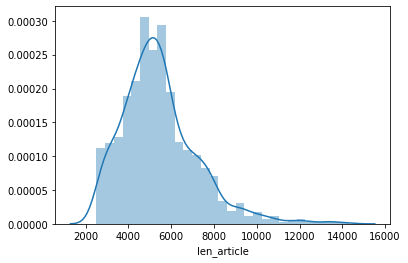

In [42]:
sns.distplot(df.len_article)

In [43]:
print('mean:', df.len_article.mean())
print('std:', df.len_article.std())
print('max:', df.len_article.max())
print('min:', df.len_article.min())

mean: 5453.938795656466
std: 1788.0269516004325
max: 14299
min: 2513


In [44]:
df.shape

(1013, 9)

The average article in the dataframe is roughly 5,453 characters in length. Taking a generous assumption that the average word is 10 characters in length (this can help account for spaces and punctuation), the average article is roughly 545 words long.

After cutting out articles with greater than 15k words and less than 2.5k words, we are left with a dataframe compmosed of just over 1k articles.


데이터 프레임의 평균 기사는 대략 5,453 철자를 포함하고 있습니다. 넉넉하게 평균적 단어의 철자가 10이라고 가정해보았을 때 (띄어쓰기나 문장부호를 설명하는데 도움), 평균적으로 기사는 대략 545 단어입니다.

In [45]:
#create new df to preserve original data
shortened_df = pd.read_csv('full_df_with_gensim_summaries.csv')

In [46]:
# drop columns
shortened_df = shortened_df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'len_article'], axis = 1)

In [47]:
# create column for first 100 words
shortened_df['split_words'] = shortened_df['Text'].str.split()
shortened_df['first_100_words'] = shortened_df['split_words'].apply(lambda x: x[:100])

In [48]:
# rejoin the words in first 100
shortened_df['first_100'] = shortened_df['first_100_words'].apply(lambda x: ' '.join(x))

In [49]:
#drop unnecessary columns
shortened_df = shortened_df.drop(['split_words', 'first_100_words'], axis = 1)

In [72]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
# tokenize each sentence in the Text column
# shortened_df['sent_tokenized'] = shortened_df.Text.apply(lambda x: sent_tokenize(x, language = 'en'))

In [52]:
shortened_df.to_csv('df_with_gensim_summaries.csv')

In [53]:
shortened_df

,Category,Title,Link,Publish,Time,Text,Topics,gensim_summary,first_100
0,Social Media,From toast of town to toxic: Facebook CEO on o...,https://technology.inquirer.net/92092/from-toa...,Associated Press,"07:14 AM November 05, 2019",WASHINGTON ? Mark Zuckerberg¡¯s social network...,"['Democrats', 'Facebook', 'Mark Zuckerberg', '...",Mark Zuckerberg¡¯s social network in Washingto...,WASHINGTON ? Mark Zuckerberg¡¯s social network...
1,Space,3-2-1-Cookoff! Astronauts to bake cookies with...,https://technology.inquirer.net/92070/3-2-1-co...,Associated Press,"04:26 PM November 04, 2019","CAPE CANAVERAL, Florida ? Forget reheated, fre...","['Astronauts', 'baking', 'Gravity', 'Internati...",Chocolate chip cookie dough is already up ther...,"CAPE CANAVERAL, Florida ? Forget reheated, fre..."
2,Social Media,"Twitter pulls back on political ads, but pitfa...",https://technology.inquirer.net/91997/twitter-...,Associated Press,"07:50 AM November 01, 2019",SAN FRANCISCO ? Twitter announced an end Wedne...,"['Jack Dorsey', 'political ads', 'Social Media...",political consultants who make a living placin...,SAN FRANCISCO ? Twitter announced an end Wedne...
3,Tech News,Freebies are the key hook in new ¡®streaming w...,https://technology.inquirer.net/91967/p2fb-fre...,Associated Press,"07:36 PM October 31, 2019","If you make it free, will they come?Apple, Dis...","['Apple', 'AT&T', 'Disney', 'HBO', 'Netflix', ...","If you make it free, will they come?Apple, Dis...","If you make it free, will they come?Apple, Dis..."
4,Earth and Environment,Brazil oil spill leaves local fishermen in the...,https://technology.inquirer.net/91841/brazil-o...,Associated Press,"05:50 PM October 29, 2019",RIO DE JANEIRO ? Holding his breath for 90 sec...,"['beach', 'Brazil', 'fishermen', 'fishing', 'o...","But, in Bahia at least, it will only be provid...",RIO DE JANEIRO ? Holding his breath for 90 sec...
...,...,...,...,...,...,...,...,...,...
1008,latest stories,Taiwan show to feature Apple tablet challengers,https://technology.inquirer.net/913/taiwan-sho...,Associated Press,"12:06 PM May 30, 2011","TAIPEI, Taiwan?Computer manufacturers of all s...","['Computing & Information Technology', 'Infoec...","TAIPEI, Taiwan?Computer manufacturers of all s...","TAIPEI, Taiwan?Computer manufacturers of all s..."
1009,Editors' Picks,Endeavour astronauts prepare for final spacewalk,https://technology.inquirer.net/826/endeavour-...,Associated Press,"11:36 AM May 27, 2011","CAPE CANAVERAL, Florida (AP) ? The crew of the...","['Astronauts', 'Endeavour', 'NASA', 'Space']",The crew of the US space shuttle Endeavour pre...,"CAPE CANAVERAL, Florida (AP) ? The crew of the..."
1010,Featured Gallery,¡®Jeopardy!¡¯-winning computer delving into me...,https://technology.inquirer.net/723/jeopardy-w...,Associated Press,"07:14 PM May 24, 2011","YORKTOWN, New York ? Some fellow in his pajama...","['Computers', 'Medicine', 'Research and Develo...","Some fellow in his pajamas, home-sick with bro...","YORKTOWN, New York ? Some fellow in his pajama..."
1011,Editors' Picks,"Review: For smartphones, what¡¯s too big or sm...",https://technology.inquirer.net/524/review-for...,Associated Press,"05:24 AM May 19, 2011",SAN FRANCISCO?With scores of smartphones avail...,"['mobile phones', 'New Products']",Two new phones take that to extremes: HP¡¯s ti...,SAN FRANCISCO?With scores of smartphones avail...


In [55]:
# shortened_df.drop(['Unnamed: 0.1.1'], axis = 1, inplace = True)

In [56]:
#preview
shortened_df.head()

,Category,Title,Link,Publish,Time,Text,Topics,gensim_summary,first_100
0,Social Media,From toast of town to toxic: Facebook CEO on o...,https://technology.inquirer.net/92092/from-toa...,Associated Press,"07:14 AM November 05, 2019",WASHINGTON ? Mark Zuckerberg¡¯s social network...,"['Democrats', 'Facebook', 'Mark Zuckerberg', '...",Mark Zuckerberg¡¯s social network in Washingto...,WASHINGTON ? Mark Zuckerberg¡¯s social network...
1,Space,3-2-1-Cookoff! Astronauts to bake cookies with...,https://technology.inquirer.net/92070/3-2-1-co...,Associated Press,"04:26 PM November 04, 2019","CAPE CANAVERAL, Florida ? Forget reheated, fre...","['Astronauts', 'baking', 'Gravity', 'Internati...",Chocolate chip cookie dough is already up ther...,"CAPE CANAVERAL, Florida ? Forget reheated, fre..."
2,Social Media,"Twitter pulls back on political ads, but pitfa...",https://technology.inquirer.net/91997/twitter-...,Associated Press,"07:50 AM November 01, 2019",SAN FRANCISCO ? Twitter announced an end Wedne...,"['Jack Dorsey', 'political ads', 'Social Media...",political consultants who make a living placin...,SAN FRANCISCO ? Twitter announced an end Wedne...
3,Tech News,Freebies are the key hook in new ¡®streaming w...,https://technology.inquirer.net/91967/p2fb-fre...,Associated Press,"07:36 PM October 31, 2019","If you make it free, will they come?Apple, Dis...","['Apple', 'AT&T', 'Disney', 'HBO', 'Netflix', ...","If you make it free, will they come?Apple, Dis...","If you make it free, will they come?Apple, Dis..."
4,Earth and Environment,Brazil oil spill leaves local fishermen in the...,https://technology.inquirer.net/91841/brazil-o...,Associated Press,"05:50 PM October 29, 2019",RIO DE JANEIRO ? Holding his breath for 90 sec...,"['beach', 'Brazil', 'fishermen', 'fishing', 'o...","But, in Bahia at least, it will only be provid...",RIO DE JANEIRO ? Holding his breath for 90 sec...
